In [19]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
import sklearn
import sklearn.neural_network

In [20]:
WindData = pd.read_csv('HovsoreData_Sonic_100m_2004-2013.csv')

In [21]:
# Filter rows where 'Wsp' is less than or equal to 35 m/s
filtered_WindData = WindData[WindData['Wsp'] <= 35]

filtered_WindData.loc[filtered_WindData["TI"] <= 0.001] = np.nan

filtered_WindData = filtered_WindData.dropna()

# Save the filtered data to a new CSV file
filtered_csv_file = 'FilteredWindData.csv'
filtered_WindData.to_csv(filtered_csv_file, index=False)

WindData = filtered_WindData

In [22]:
U = WindData['Wsp']

In [23]:
Umean = np.mean(U)
Ustd = np.std(U)

n = len(U) # Count the number of samples


print("Umean = ", Umean)
print("Ustd = ", Ustd)
print("n = ", n)

Umean =  8.83891997435993
Ustd =  4.563811841180505
n =  429796


In [24]:
alpha =  1 - 0.95# Corresponding to 95% probability  ( alpha = 1-p)

In [25]:
Nbootstrap = 100 #99999
BootstrapSize = len(U)

Bsample = np.random.randint(low = 0, high = 8, size = (Nbootstrap,BootstrapSize))
BootstrapSample = np.zeros((Nbootstrap,BootstrapSize))
for i in range(Nbootstrap):
    for j in range(BootstrapSize):
        BootstrapSample[i,j] = U[Bsample[i,j]]
        
#BootstrapSample = 

BootstrapMeans = np.mean(BootstrapSample, axis=1)
BootstrapMeans = np.sort(BootstrapMeans)

Rlow = int((Nbootstrap+1) * (alpha/2) )
Rhigh = int((Nbootstrap+1) * (1-alpha/2))

CIn_B = BootstrapMeans[Rlow]
CIp_B = BootstrapMeans[Rhigh]

print('Confidence interval based on bootstrapping: [' + str(CIn_B) + ', ' + str(CIp_B) + ']')

Confidence interval based on bootstrapping: [10.0988704224795, 10.10171439450344]


In [26]:
print("Fitting the environmental uncertainty variable 𝑋𝑊:")
print("Did you try bootstrapping directly on the data? What did you notice? The uncertainty likely depends on the")
print("bootstrap sample size (how many points you use in each bootstrap sample). In order to determine the right") 
print("bootstrap sample size, we should consider what the wind speed has certain long variation cycles (diurnal,") 
print("seasonal), hence shuffling the data may not be the most realistic way to determine the uncertainty as it") 
print("eliminates these long-term variations. The suggested approach is to take each bootstrap sample (or other") 
print("methodology) based on samples which take a continuous piece of the data (e.g. one continuous period at a") 
print("time), and the randomness is achieved by randomly shifting the starting point of the sample. What is the") 
print("minimum period duration you should consider?")

Fitting the environmental uncertainty variable 𝑋𝑊:
Did you try bootstrapping directly on the data? What did you notice? The uncertainty likely depends on the
bootstrap sample size (how many points you use in each bootstrap sample). In order to determine the right
bootstrap sample size, we should consider what the wind speed has certain long variation cycles (diurnal,
seasonal), hence shuffling the data may not be the most realistic way to determine the uncertainty as it
eliminates these long-term variations. The suggested approach is to take each bootstrap sample (or other
methodology) based on samples which take a continuous piece of the data (e.g. one continuous period at a
time), and the randomness is achieved by randomly shifting the starting point of the sample. What is the
minimum period duration you should consider?


In [52]:
Nbootstrap = 100 #99999  # How many times you wanna do this random act
#BootstrapSize = len(U)
#BootstrapMeans = np.mean(U)

N1year = int(1*365*24*6) # taking an interval for 1 year with 365 days with 24 hours with 6 times 10 minute intervals


#for i in range(N1year): # you take the range of this 1 year
    
# here you take a random sample and then use that sample to locate the next year
Yearsample = np.random.randint(low = 0, high = len(WindData) - N1year) #, size = (Nbootstrap,BootstrapSize))

print("Yearsample = ", Yearsample)

Winddata_1_year = WindData[Yearsample:Yearsample + N1year]
print("Winddata_1_year = ", Winddata_1_year)

#Bsample = np.random.randint(low = 0, high = 8, size = (Nbootstrap,BootstrapSize))
#Bsample = np.random.randint(low = 0, high = len(WindData) - N1year)

BootstrapSize = len(Winddata_1_year)

# now select the year in which we do the bootstrapping
BootstrapSample = np.zeros((Nbootstrap,BootstrapSize))

# now do bootstrapping over the chosen year
#for j in range(Nbootstrap):
#    # Extract a bootstrap sample using the indices from Bsample
#    bootstrap_indices = Bsample[j] + np.arange(BootstrapSize)
#    BootstrapSample[j, :] = Winddata[bootstrap_indices]
print("========================================================")
print("Starting Bootstrap...")
for i in range(Nbootstrap):
    print("i = ", i)
    for j in range(BootstrapSize):
        ##print("Winddata_1_year['Timestamp'].idxmin() = ",Winddata_1_year['Timestamp'].idxmin())
        ##print("Winddata_1_year['Timestamp'].idxmax() = ",Winddata_1_year['Timestamp'].idxmax())
        #Bsample = np.random.randint(low = Winddata_1_year['Timestamp'].idxmin(), high =Winddata_1_year['Timestamp'].idxmax())
        #print("Bsample = ",Bsample)
        
                # Initialize Bsample to be outside the valid range
        Bsample = np.random.randint(low = Winddata_1_year['Timestamp'].idxmin(), high =Winddata_1_year['Timestamp'].idxmax())
        #Bsample = -1
        
        # Keep generating a new random sample until it's a valid index
        while Bsample not in Winddata_1_year.index:
            #print("Wrong sample, i = ",i,", j = ", j)
            Bsample = np.random.randint(low=Winddata_1_year['Timestamp'].idxmin(), high=Winddata_1_year['Timestamp'].idxmax())
        
        ##print("Bsample =", Bsample)
        
        #print("Winddata_1_year = ", Winddata_1_year)
        #print(Winddata_1_year['Wsp', index = Bsample])
        #print(Winddata_1_year)
        #print(Winddata_1_year[Winddata_1_year['Timestamp'].idxmax()])
        ##print("Winddata_1_year.loc[Bsample, 'Wsp'] = ", Winddata_1_year.loc[Bsample, 'Wsp'])
        BootstrapSample[i,j] = Winddata_1_year.loc[Bsample, 'Wsp'] #Winddata_1_year['Wsp', index = Bsample]

print("DONE!!")
# repeat this process

#BootstrapSample[i,j] = U[Bsample[i,j]]
        
#BootstrapSample = 

BootstrapMeans = np.mean(BootstrapSample, axis=1)
BootstrapMeans = np.sort(BootstrapMeans)

Rlow = int((Nbootstrap+1) * (alpha/2) )
Rhigh = int((Nbootstrap+1) * (1-alpha/2))

CIn_B = BootstrapMeans[Rlow]
CIp_B = BootstrapMeans[Rhigh]

print('Confidence interval based on bootstrapping: [' + str(CIn_B) + ', ' + str(CIp_B) + ']')

Yearsample =  235190
Winddata_1_year =             Timestamp      Wsp      TI  TI,detrend   MeanDir  MeanTrigDir  \
240937  2.009072e+11  10.3833  0.0917      0.0915  273.5224     273.5214   
240938  2.009072e+11  11.0953  0.0829      0.0757  275.1803     275.1817   
240939  2.009072e+11  11.0762  0.0641      0.0619  275.4089     275.4072   
240940  2.009072e+11  10.0954  0.1170      0.1154  275.9748     275.9758   
240941  2.009072e+11  11.0634  0.0540      0.0538  276.4636     276.4631   
...              ...      ...     ...         ...       ...          ...   
296651  2.010083e+11   5.2231  0.0986      0.0864  263.8059     263.7780   
296652  2.010083e+11   5.3019  0.1073      0.1071  269.2499     269.2486   
296653  2.010083e+11   4.8268  0.1047      0.1034  264.7629     264.7694   
296654  2.010083e+11   5.0579  0.1100      0.0847  267.1600     267.1597   
296655  2.010083e+11   7.5518  0.0836      0.0829  257.3909     257.3903   

        StdDir   MinDir   MaxDir  
240937  4.16

In [18]:
print(Winddata_1_year)

           Timestamp     Wsp      TI  TI,detrend   MeanDir  MeanTrigDir  \
179862  200805020840  2.2792  0.0000      0.0000  189.0960     189.0960   
179863  200805020850  2.2792  0.0000      0.0000  189.0960     189.0960   
179864  200805020900  2.2792  0.0000      0.0000  189.0960     189.0960   
179865  200805020910  2.2792  0.0000      0.0000  189.0960     189.0960   
179866  200805020920  2.2792  0.0000      0.0000  189.0960     189.0960   
...              ...     ...     ...         ...       ...          ...   
232420  200905191830  5.1148  0.0797      0.0757  186.3581     186.3531   
232421  200905191840  5.4851  0.0696      0.0660  186.7520     186.7519   
232422  200905191850  5.2665  0.0650      0.0604  184.2120     184.2107   
232423  200905191900  5.0801  0.0609      0.0556  187.5387     187.5462   
232424  200905191910  5.7974  0.0835      0.0555  200.4931     200.4940   

        StdDir   MinDir   MaxDir  
179862  0.0000  189.096  189.096  
179863  0.0000  189.096  189.

In [53]:
# Confidence intervals using directly the Standard Normal distribution
k_alpha = stats.norm.ppf(alpha/2)
k_alpha_p = - stats.norm.ppf(1-alpha/2)

CIn_N = Umean + k_alpha * (Ustd/(np.sqrt(n)))
CIp_N = Umean - k_alpha * (Ustd/(np.sqrt(n)))

print('Confidence interval based on the Normal distribution: [' + str(CIn_N) + ', ' + str(CIp_N) + ']')

Confidence interval based on the Normal distribution: [8.825275882420442, 8.852564066299418]


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

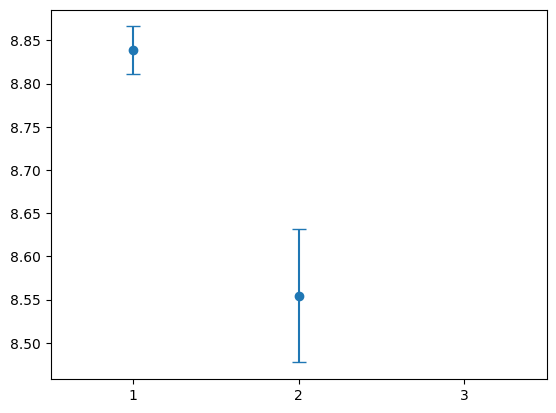

In [54]:
# Plot errorbars
fig0, ax0 = plt.subplots()
ax0.errorbar([1, 2], [Umean, np.mean(BootstrapMeans)],
             yerr = [(CIp_N - CIn_N), (CIp_B - CIn_B)],
            linestyle = '',marker = 'o',capsize = 5)
ax0.set_xlim([0.5,3.5])
ax0.set_xticks([1,2,3])
ax0.set_xticklabels(['Normal dist.','Bootstrapping'])
ax0.set_ylabel('Annual mean wind speed [m/s]')
plt.show()

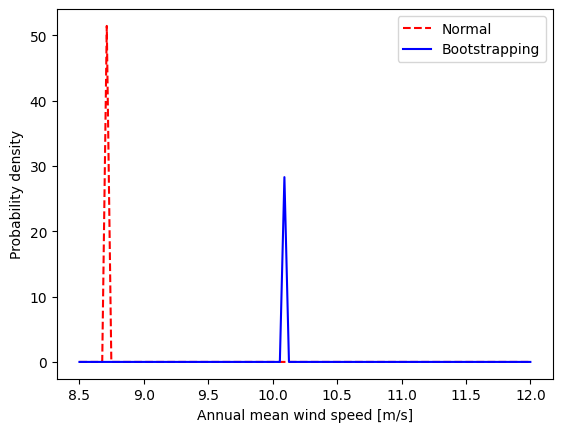

In [11]:
# Plot pdfs

Ubins = np.linspace(8.5,12,100)

pdf_N = stats.norm.pdf(Ubins,Umean,Ustd/np.sqrt(n))
dU = Ubins[1]-Ubins[0] # Scaling factor for the t-pdf to make sure we get a valid pdf for every bin spacing
pdf_T = (1/np.sqrt(dU))*stats.t.pdf((Ubins - Umean)/(Ustd/np.sqrt(n)), n - 1)

# Generating an empirical pdf from the bootstrap sample
BootstrapHist = np.histogram(BootstrapMeans,bins = Ubins)
BootstrapDist = stats.rv_histogram(BootstrapHist)
pdf_B = BootstrapDist.pdf(Ubins)

fig1, ax1 = plt.subplots()
p11 = ax1.plot(Ubins,pdf_N,'--r', label = 'Normal')
p12 = ax1.plot(Ubins,pdf_B,'-b', label = 'Bootstrapping')
plt.xlabel('Annual mean wind speed [m/s]')
plt.ylabel('Probability density')
plt.legend()

plt.show()